In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import cv2
from scipy import ndimage
from matplotlib import pyplot
import scipy
from PIL import Image
from skimage import measure

C:\Users\Harvard\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# load data

In [2]:
cd U:\Elisa\muscle

U:\Elisa\muscle


In [5]:
f = Image.open("mask41noassign.vsseg_export_s000"+".png")

In [6]:
im = np.asarray(f)

In [7]:
im.shape

(543, 1046)

In [8]:
n = np.zeros((126,543,1046),dtype = "uint8")

In [9]:
cd X:\siyan\synaptic area\muscle_saturated

X:\siyan\synaptic area\muscle_saturated


In [10]:
for i in range(126):
    try:
        f = Image.open("mask41noassign.vsseg_export_s" +str("%03d"%i)+".png")
    except FileNotFoundError:
        empty = np.zeros((7315, 14085))
        scipy.misc.imsave('mask41noassign.vsseg_export_s'+str("%03d"%i)+'.png', empty)
        continue
    im = np.asarray(f)
    n[i] = im

In [11]:
muscle = (n == 13)
axon = (n == 6)

In [35]:
np.sum(axon)

10544724

In [12]:
axon.dtype

dtype('bool')

In [13]:
del n

# dilate

In [23]:
daxon = np.zeros((126,543,1046),dtype = "bool")

In [24]:
for i in range(126):
    print (i)
    dt = ndimage.distance_transform_edt(1-axon[i]) 
    dsection = (dt<10)
    daxon[i] += dsection
    if i-1 >= 0:
        daxon[i-1] += dsection
    if i-2 >= 0:
        daxon[i-2] += dsection
    if i+1 <= 125:
        daxon[i+1] += dsection
    if i+2 <= 125:
        daxon[i+2] += dsection

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125


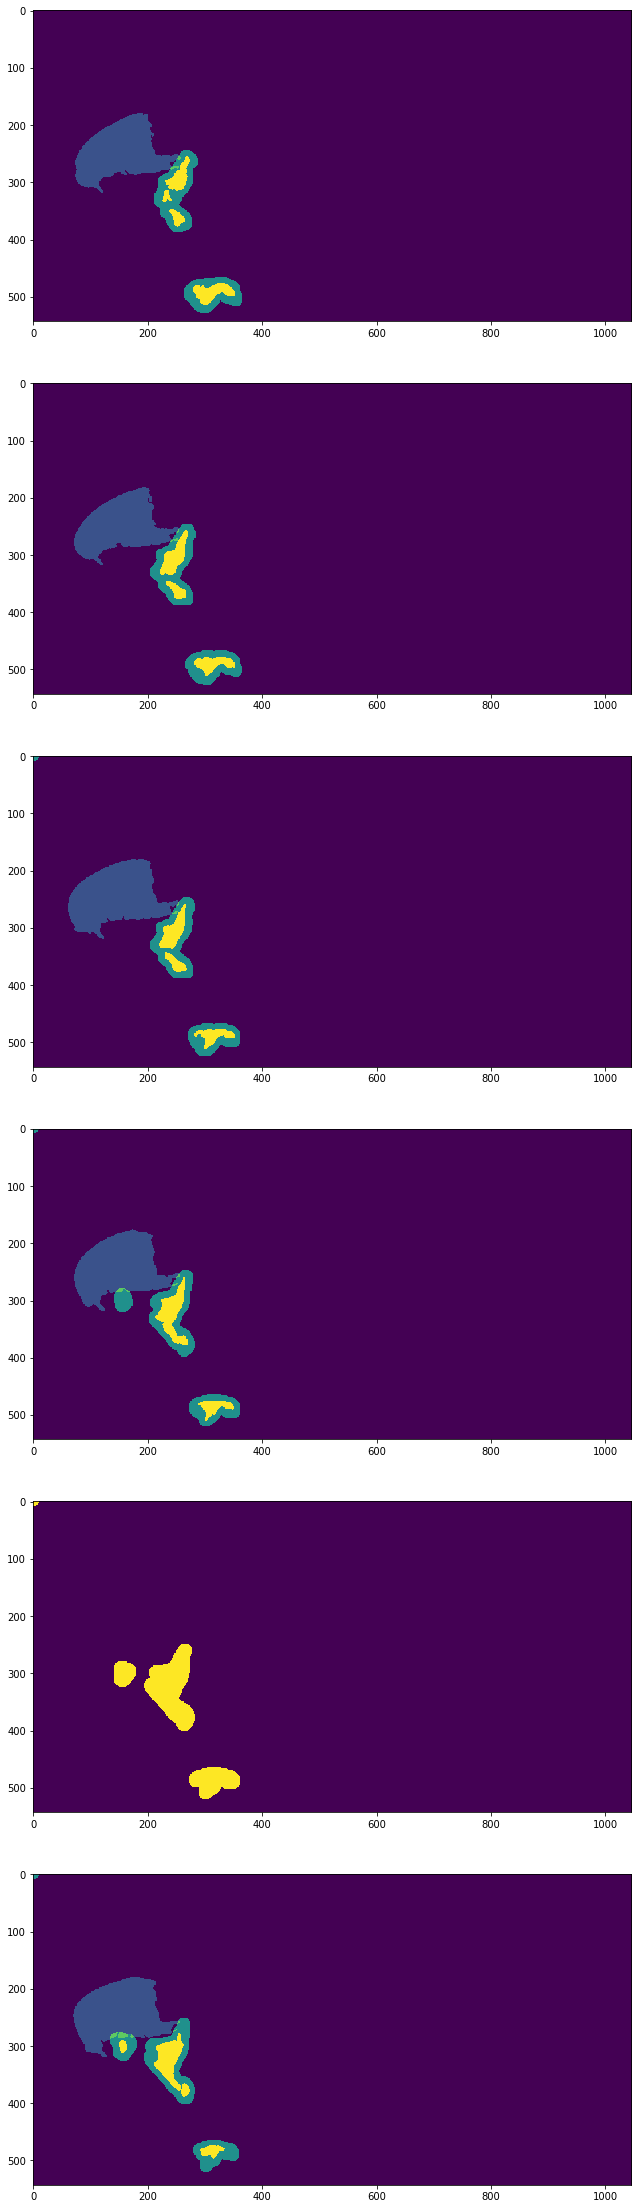

In [25]:
fig,ax = plt.subplots(6,1,figsize = (80,40))
for i in range(6):
    ax[i].imshow(2*daxon[i+80]+muscle[i+80]+2*axon[i+80])

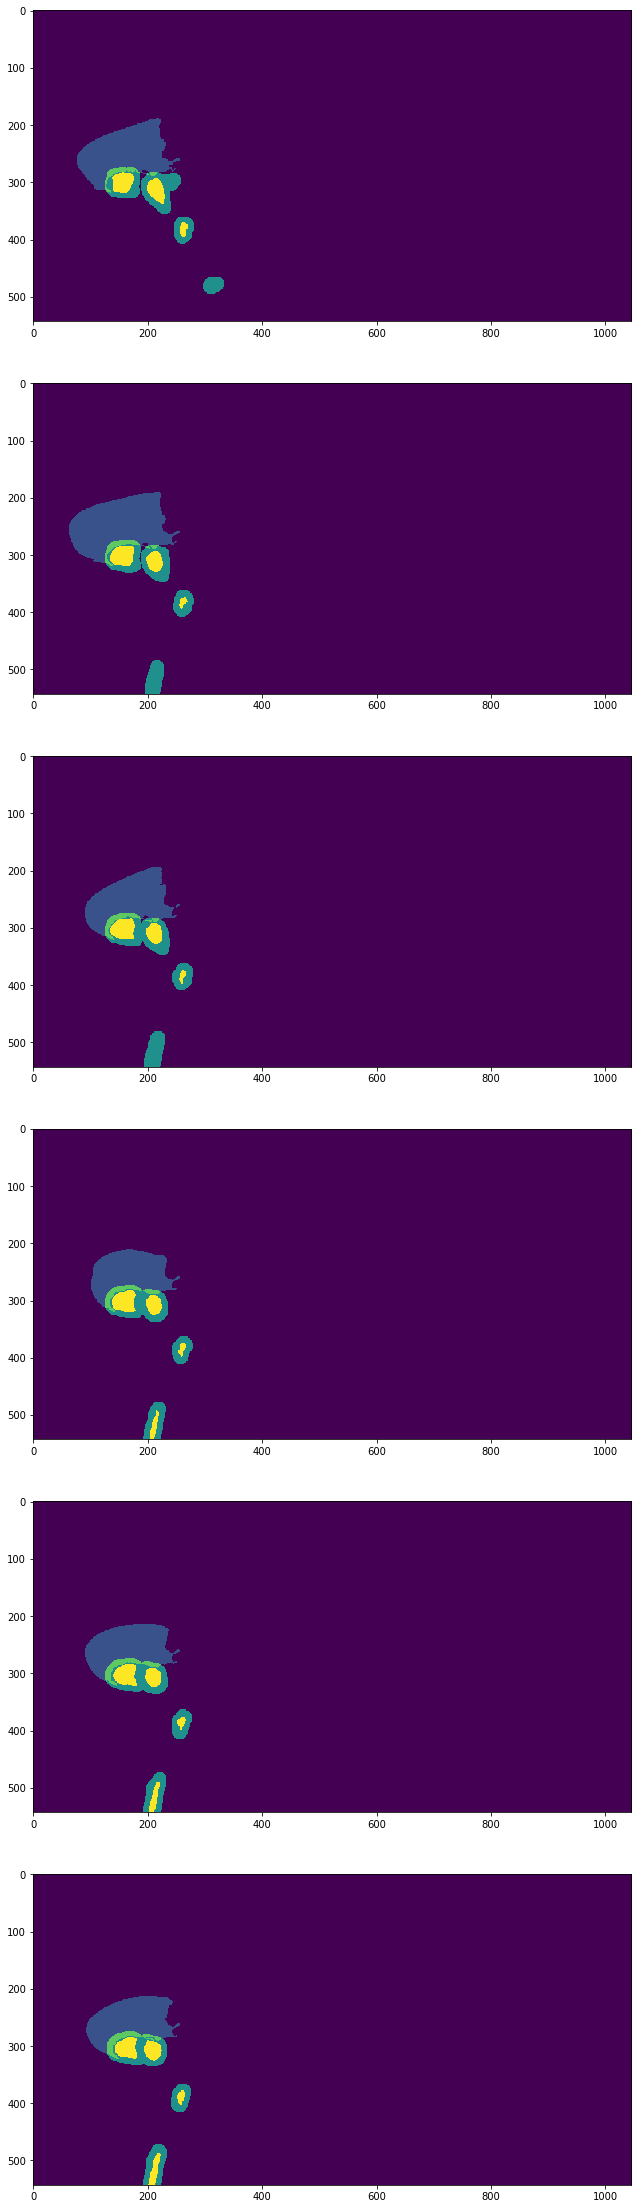

In [26]:
fig,ax = plt.subplots(6,1,figsize = (80,40))
for i in range(6):
    ax[i].imshow(2*daxon[i+90]+muscle[i+90]+2*axon[i+90])

# overlap

In [27]:
overlap = (daxon == 1) * (muscle == 1)

# boundry

directly perform distance transform has memoryerror

In [49]:
dt = ndimage.distance_transform_edt(axon_nonterminal) 
b_non = (dt<1)

MemoryError: 

so let perform in bounding box instead

In [28]:
zMIN = 0
zMAX = 125
for i in range(126):
    sum = np.sum(overlap[i,:,:])
    if zMIN == 0 and sum > 0:
        zMIN = i
    if sum > 0:
        zMAX = i
print (zMIN,zMAX)

71 122


In [30]:
xMIN = 0
xMAX = 543
for i in range(543):
    sum = np.sum(overlap[:,i,:])
    if xMIN == 0 and sum > 0:
        xMIN = i
    if sum > 0:
        xMAX = i
print (xMIN,xMAX)

254 335


In [31]:
yMIN = 0
yMAX = 1046
for i in range(1046):
    sum = np.sum(overlap[:,:,i])
    if yMIN == 0 and sum > 0:
        yMIN = i
    if sum > 0:
        yMAX = i
print (yMIN,yMAX)

125 265


### surface for daxon

In [32]:
dt_daxon = ndimage.distance_transform_edt(daxon[zMIN:zMAX+1,xMIN:xMAX+1,yMIN:yMAX+1]) 

In [34]:
f_boundry = (dt_daxon == 1)

### surface for overlap

In [35]:
dt_ol = ndimage.distance_transform_edt(overlap[zMIN:zMAX+1,xMIN:xMAX+1,yMIN:yMAX+1]) 

In [36]:
t_boundry = (dt_ol == 1)

In [37]:
inner = t_boundry * f_boundry

In [38]:
boundry = t_boundry ^ inner

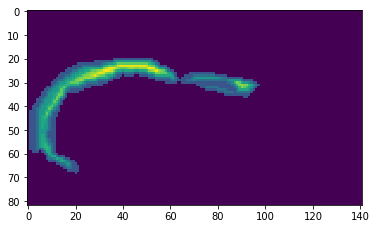

In [54]:
plt.imshow(dt_ol[23])

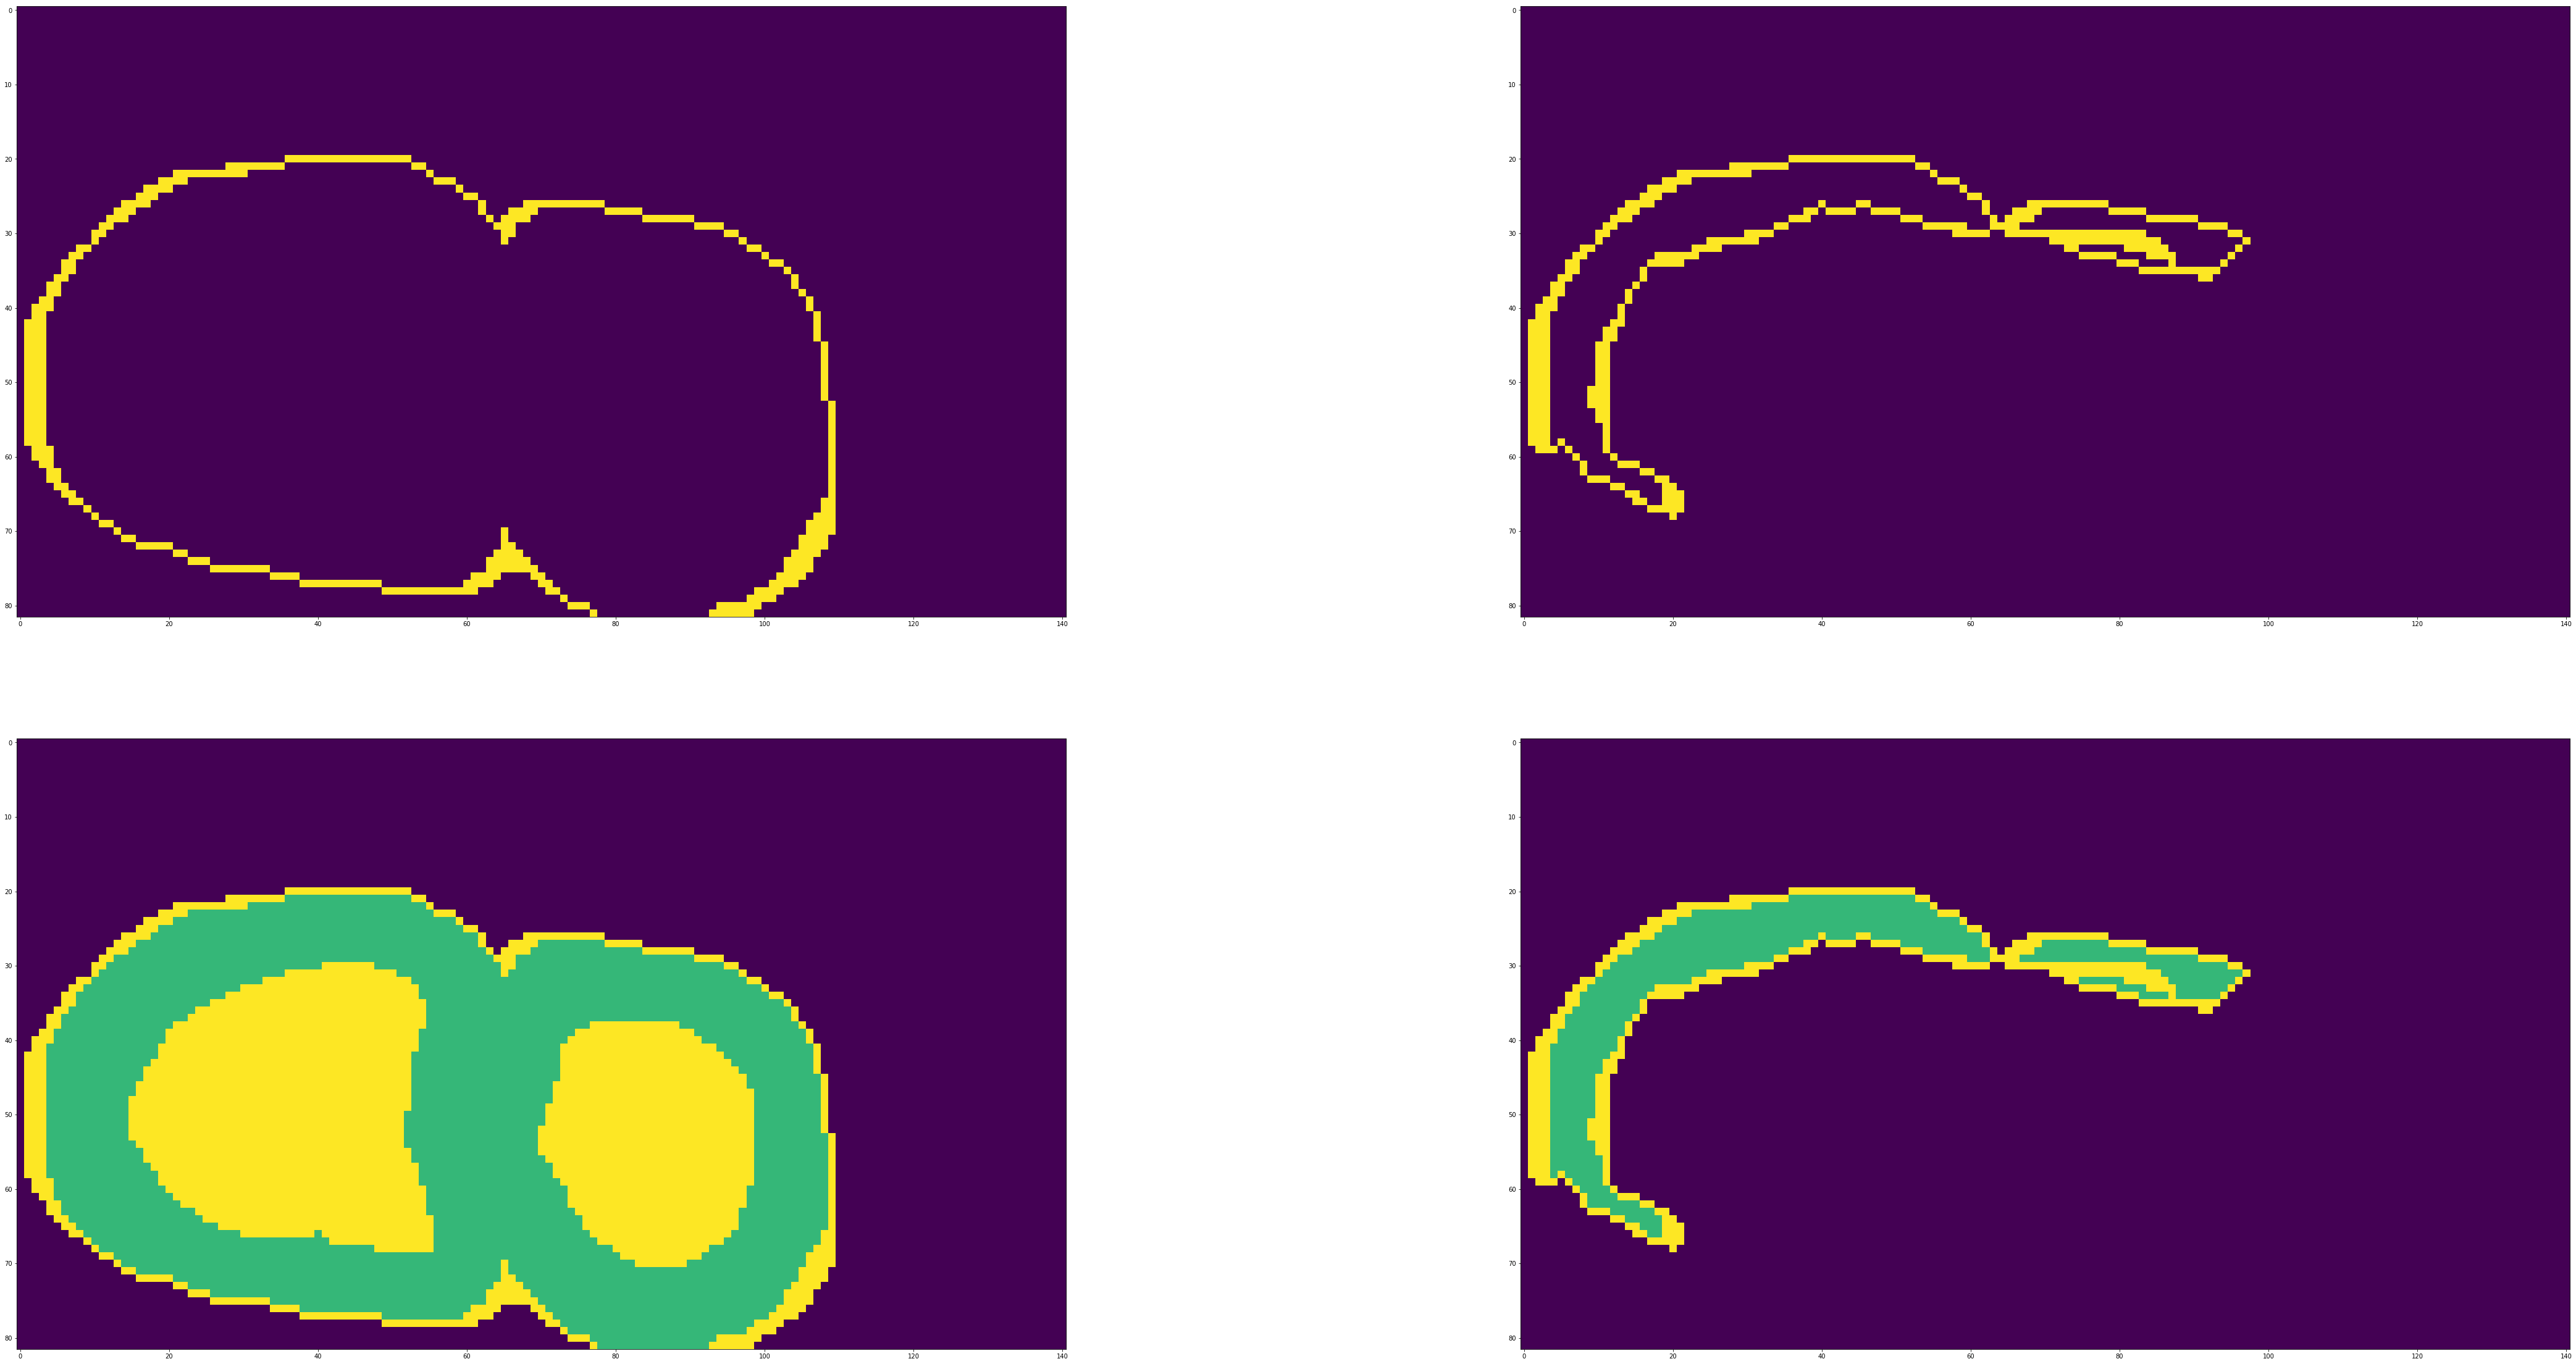

In [45]:
fig,ax = plt.subplots(2,2,figsize = (80,40))
ax[0,0].imshow(f_boundry[23])
ax[0,1].imshow(t_boundry[23])
ax[1,0].imshow(f_boundry[23]+2*daxon[94,xMIN:xMAX+1,yMIN:yMAX+1]+axon[94,xMIN:xMAX+1,yMIN:yMAX+1])
ax[1,1].imshow(t_boundry[23]+2*overlap[94,xMIN:xMAX+1,yMIN:yMAX+1])

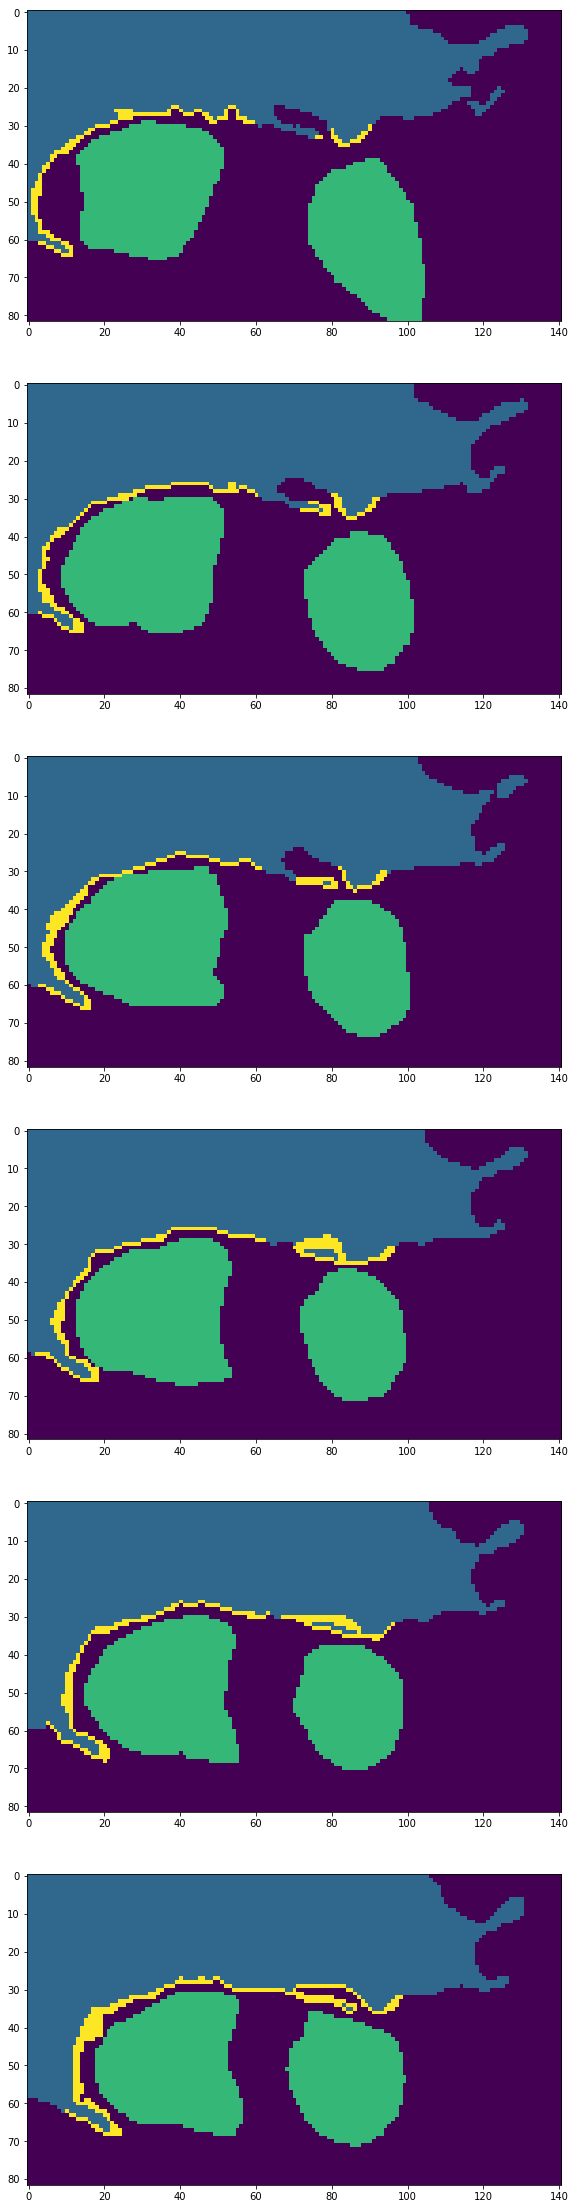

In [42]:
fig,ax = plt.subplots(6,1,figsize = (80,40))
for i in range(6):
    ax[i].imshow(2*boundry[i+90-zMIN]+muscle[i+90,xMIN:xMAX+1,yMIN:yMAX+1]+2*axon[i+90,xMIN:xMAX+1,yMIN:yMAX+1])

In [57]:
for i in range(6):
    t = 2*boundry[i+90-zMIN]+muscle[i+90,xMIN:xMAX+1,yMIN:yMAX+1]+2*axon[i+90,xMIN:xMAX+1,yMIN:yMAX+1]
    j = i+90
    scipy.misc.imsave('postsynaptic_area'+str("%03d"%j)+'.png', t)

C:\Users\Harvard\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  after removing the cwd from sys.path.


In [69]:
muscle[i+90,xMIN:xMAX+1,yMIN:yMAX+1].shape

(82, 141)

In [71]:
six = np.zeros((82,141))
six[81,140]=6

In [73]:
cd E:\Siyan Zhou\lab meeting\area

E:\Siyan Zhou\lab meeting\area


C:\Users\Harvard\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  
C:\Users\Harvard\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  import sys
C:\Users\Harvard\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


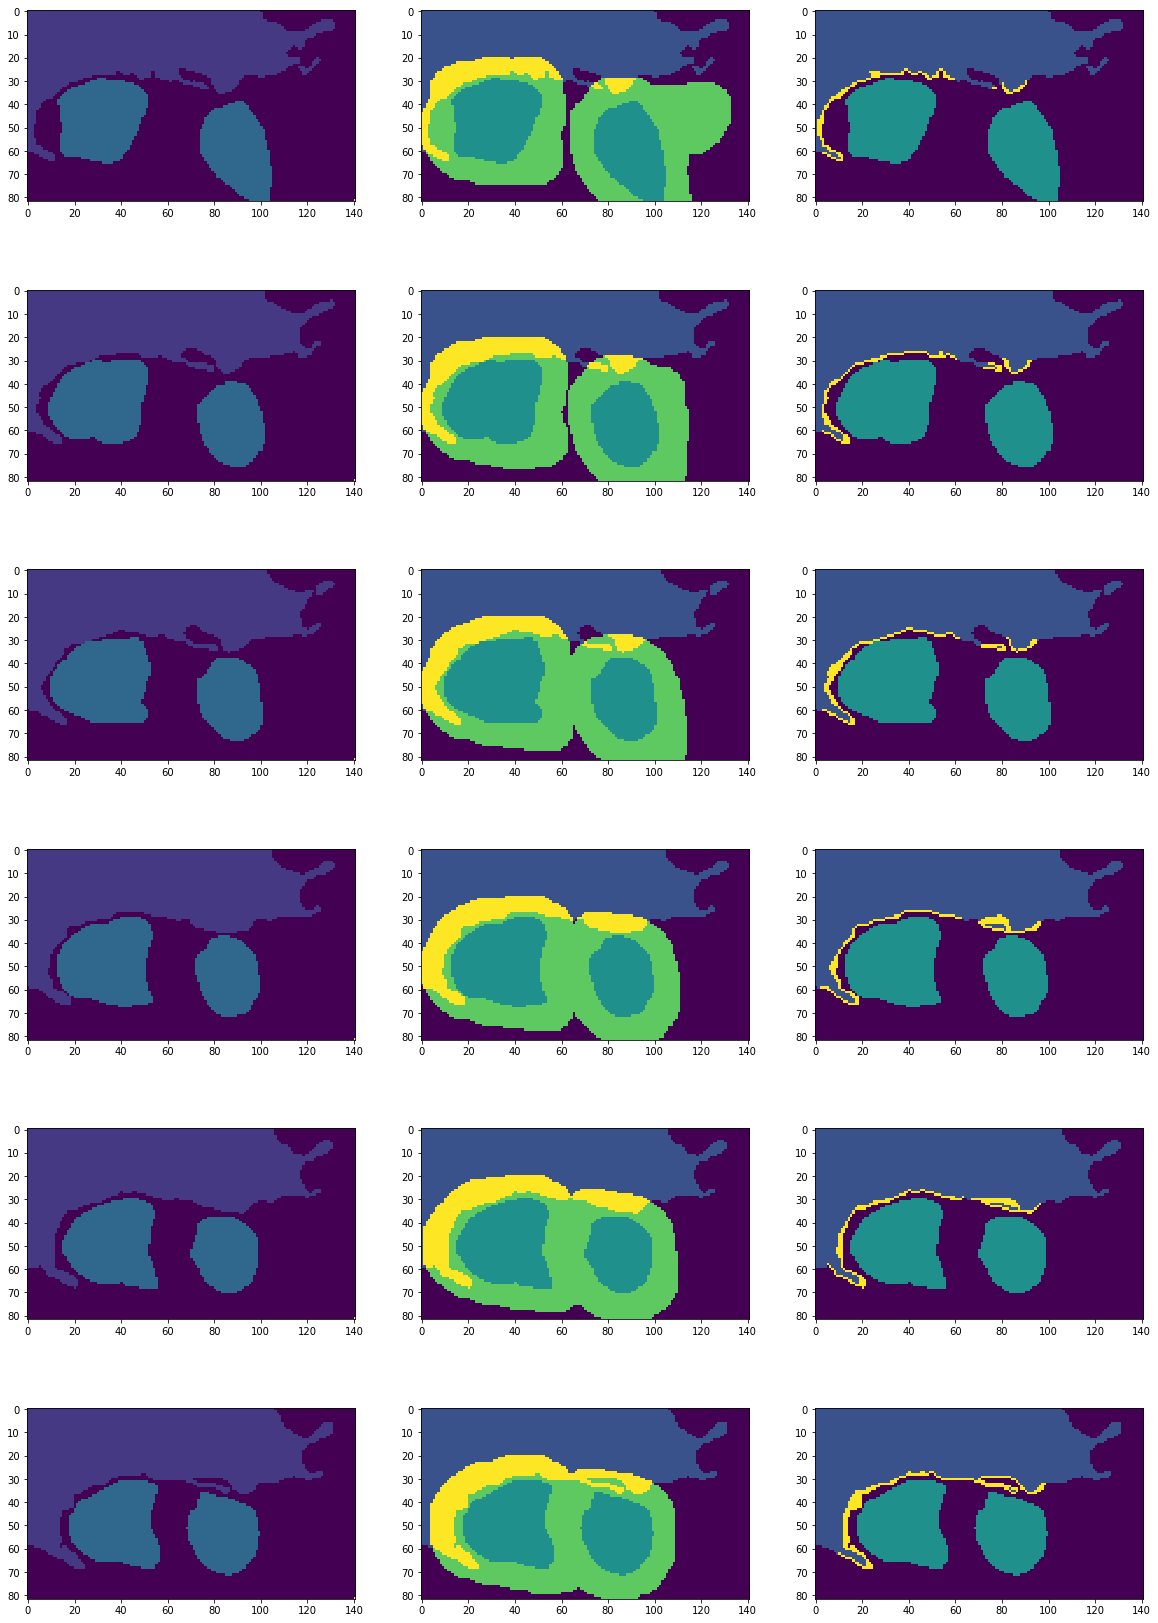

In [75]:
fig,ax = plt.subplots(6,3,figsize = (20,30))
for i in range(6):
    ax[i,1].imshow(3*daxon[i+90,xMIN:xMAX+1,yMIN:yMAX+1]+muscle[i+90,xMIN:xMAX+1,yMIN:yMAX+1]-1*axon[i+90,xMIN:xMAX+1,yMIN:yMAX+1])
    ax[i,2].imshow(3*boundry[i+90-zMIN]+muscle[i+90,xMIN:xMAX+1,yMIN:yMAX+1]+2*axon[i+90,xMIN:xMAX+1,yMIN:yMAX+1])
    ax[i,0].imshow(muscle[i+90,xMIN:xMAX+1,yMIN:yMAX+1]+2*axon[i+90,xMIN:xMAX+1,yMIN:yMAX+1]+six)

In [56]:
cd U:\Siyan\axon_terminal_recognation\result

U:\Siyan\axon_terminal_recognation\result


In [87]:
for i in range(126):
    t = np.zeros((7315, 14085))
    if i in range(126)[zMIN:zMAX+1]:
        t[xMIN:xMAX+1,yMIN:yMAX+1] = boundry[i-zMIN]
    scipy.misc.imsave('axon_terminal_'+str("%03d"%i)+'.png', t)
    print(i)

C:\Users\Harvard\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125


# approach 1: pixel in each section*60

### count pixel

In [ ]:
np.unique()

In [ ]:
area = num * 60

# approach 2: smooth the cleft

### smooth

### calculate pixels